In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from Cython.Build.Inline import _get_build_extension
import seaborn as sns
import tensorflow as tf
import keras
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [2]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [3]:
df = yf.download('BANKNIFTY', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
df.tail()


1 Failed download:
['BANKNIFTY']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Date,Open,High,Low,Close,Adj Close,Volume


In [4]:
import yfinance as yf

def fetch_bank_nifty_data():
    try:
        nifty_ticker = "^NSEBANK"  # Ticker symbol for Bank Nifty
        bank_nifty_data = yf.download(nifty_ticker, period="1d")  # Fetch daily data

        if not bank_nifty_data.empty:
            print(bank_nifty_data.tail())  # Print the last few rows of data
        else:
            print("No data found for Bank Nifty.")

    except Exception as ex:
        print(f"An error occurred: {ex}")

if __name__ == "__main__":
    fetch_bank_nifty_data()

[*********************100%***********************]  1 of 1 completed
                Open          High           Low    Close  Adj Close  Volume
Date                                                                        
2023-08-04  44754.75  45118.050781  44520.550781  44879.5    44879.5  245200


[*********************100%***********************]  1 of 1 completed


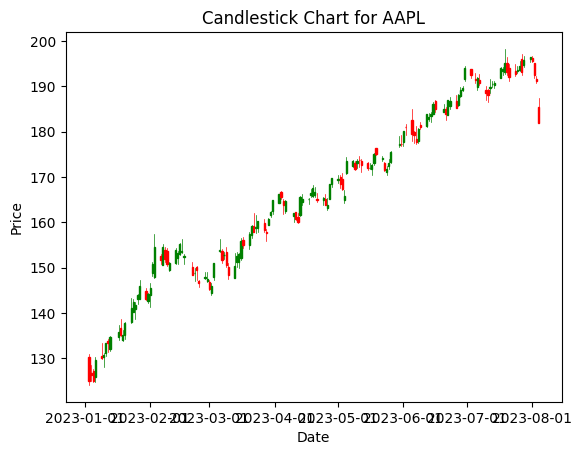

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

def plot_candle_chart(ticker, start_date, end_date):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        
        if stock_data.empty:
            print(f"No data found for {ticker} in the specified date range.")
            return

        # Convert the date format to be used in the candlestick_ohlc function
        stock_data["Date"] = mdates.date2num(stock_data.index.to_pydatetime())

        # Create the figure and axes for the plot
        fig, ax = plt.subplots()

        # Plot the candlesticks
        candlestick_ohlc(ax, stock_data[["Date", "Open", "High", "Low", "Close"]].values, width=0.6, colorup='g', colordown='r')

        # Format the x-axis as dates
        ax.xaxis_date()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        # Add labels and title
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        plt.title(f"Candlestick Chart for {ticker}")

        # Show the plot
        plt.show()

    except Exception as ex:
        print(f"An error occurred: {ex}")

if __name__ == "__main__":
    ticker_symbol = "AAPL"  # Replace with the desired ticker symbol
    start_date = "2023-01-01"  # Replace with the desired start date
    end_date = "2023-08-05"  # Replace with the desired end date

    plot_candle_chart(ticker_symbol, start_date, end_date)


In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

def fetch_live_data(ticker):
    # Replace this function with the code to fetch live data from your chosen data source via WebSocket
    # You can use libraries like 'websocket-client' or other WebSocket implementations
    # Store the live data in a global data structure for later use in the chart
    data = yf.download(ticker, period="1d")
    return data

def update_data(interval, data):
    # Replace this function to fetch new data at regular intervals from your data source via WebSocket
    # Append the new data to the existing data structure
    new_data = yf.download(ticker, period="1h")
    data = data.append(new_data)
    return data

def plot_live_chart(data, timeframe="1h"):
    # Create the figure and axes for the plot
    fig, ax = plt.subplots()

    # Convert the date format to be used in the candlestick_ohlc function
    data["Date"] = mdates.date2num(data.index.to_pydatetime())

    # Plot the candlesticks based on the selected timeframe
    if timeframe == "1h":
        candlestick_ohlc(ax, data[["Date", "Open", "High", "Low", "Close"]].values, width=0.6, colorup='g', colordown='r')
    elif timeframe == "5m":
        # Implement logic to downsample data to 5-minute candlesticks
        pass

    # Format the x-axis as dates
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    # Add labels and title
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.title(f"Candlestick Chart ({timeframe} timeframe) for {ticker}")

def animate(interval, data):
    # Function to be called for each animation frame
    # Here, we update the data and plot the live chart
    data = update_data(interval, data)
    plt.cla()  # Clear the previous plot
    plot_live_chart(data, timeframe="1h")

if __name__ == "__main__":
    ticker = "AAPL"  # Replace with the desired ticker symbol
    data = fetch_live_data(ticker)

    # Update the chart every 10 seconds (adjust the interval based on your requirements)
    interval = 10 * 1000  # Convert to milliseconds
    ani = animation.FuncAnimation(plt.gcf(), animate, fargs=(data,), interval=interval)

    # Show the plot
    plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\sai\AppData\Local\Temp\ipykernel_5564\1765548142.py:57: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(plt.gcf(), animate, fargs=(data,), interval=interval)


<Figure size 640x480 with 0 Axes>

In [ ]:
import websocket
import threading
import time

def on_message(ws, message):
    print(f"Received: {message}")
    # Implement logic to process the received data here

def on_error(ws, error):
    print(f"Error: {error}")
    # Implement error handling logic here

def on_close(ws, close_status_code, close_msg):
    print("Connection closed")
    # Implement any necessary cleanup or reconnection logic here

def create_websocket():
    ws = websocket.WebSocketApp("wss://streamer.finance.yahoo.com",
                                on_message=on_message,
                                on_error=on_error,
                                on_close=on_close)
    return ws

def run_websocket():
    ws = create_websocket()
    ws.run_forever()

if __name__ == "__main__":
    websocket_thread = threading.Thread(target=run_websocket)
    websocket_thread.start()

    # Your main program logic can continue here or simply wait for the WebSocket thread to finish
    while True:
        time.sleep(1)


In [ ]:
import aiohttp
import asyncio
import plotly.graph_objects as go
from IPython.display import display, clear_output

async def fetch_candlestick_data(session):
    # ... Same code as before ...

async def update_chart():
    figure = go.Figure(data=[go.Candlestick(x=[],
                                           open=[],
                                           high=[],
                                           low=[],
                                           close=[])])
    figure.update_layout(title="Live Candlestick Chart",
                         xaxis_rangeslider_visible=False)

    async with aiohttp.ClientSession() as session:
        while True:
            # Fetch live candlestick data
            candlestick_data = await fetch_candlestick_data(session)

            # Extract data into separate lists for the chart
            dates = [data['date'] for data in candlestick_data]
            opens = [data['open'] for data in candlestick_data]
            highs = [data['high'] for data in candlestick_data]
            lows = [data['low'] for data in candlestick_data]
            closes = [data['close'] for data in candlestick_data]

            # Update the chart data
            figure.update_traces(x=dates,
                                 open=opens,
                                 high=highs,
                                 low=lows,
                                 close=closes)

            # Clear the previous chart output and display the updated chart
            clear_output(wait=True)
            display(figure.show())

            # Add a delay of 5 seconds before making the next request
            await asyncio.sleep(5)

# Create and run the event loop
loop = asyncio.get_event_loop()
loop.run_until_complete(update_chart())


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_bank_nifty():
    url = "https://www.nseindia.com/indices/live_indices.htm"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception if the request is not successful
        soup = BeautifulSoup(response.content, "html.parser")
        bank_nifty_table = soup.find("table", {"id": "liveIndexTable"})

        if bank_nifty_table:
            rows = bank_nifty_table.find_all("tr")
            for row in rows[1:]:
                columns = row.find_all("td")
                index_name = columns[0].text.strip()
                last_price = columns[1].text.strip()
                change = columns[2].text.strip()
                percent_change = columns[3].text.strip()

                print(f"{index_name}: Last Price - {last_price}, Change - {change}, Percent Change - {percent_change}")

        else:
            print("Unable to find Bank Nifty data on the website.")

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
    except Exception as ex:
        print(f"An error occurred: {ex}")

if __name__ == "__main__":
    scrape_bank_nifty()
